with encryption
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
------------------------------
without encryption
1.0907868549287507
1.0725258689303143
1.0551417649071446
1.0387248626294365
1.0233485377010625
1.0090699750257939
0.9959310118096409
0.9839590544043578
0.9731680539391594


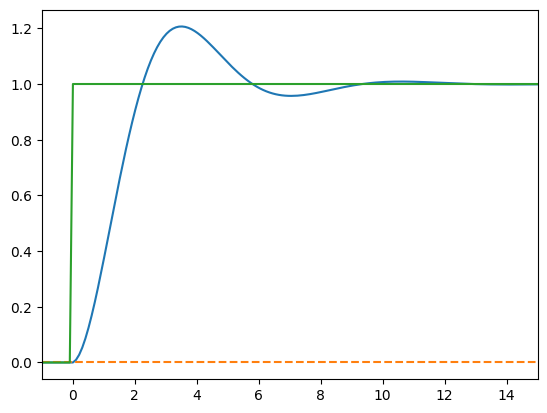

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from plant import encrypt_mat,sai2vec
from controller import sai

def my_sys(A,B,C,D,r,nt,encryption = True):
    ys = []
    x = np.zeros((len(A),1))
    y = np.matrix([[0]])
    xc = 0
    for i in range(nt):


        if encryption:
            v = r[i]-y[0,0]
            phi = [[1,0.25],[0.4,0]]
            zeta = [xc,v]
            phi_enc  = encrypt_mat(phi)
            zeta_enc = encrypt_mat([zeta])[0]
            mysai = sai(phi_enc,zeta_enc)
            ans = sai2vec(mysai)
            xc = ans[0]
            u = ans[1] 
            if i>50 and i<60:
                print(u)
        else:
            v = r[i]-y[0,0]
            phi = np.matrix([[1,0.25],[0.4,0]])
            zeta = np.matrix([[xc],[v]])
            ans = np.dot(phi,zeta)
            xc = ans[0,0]
            u = ans[1,0]
            if i>50 and i<60:
                print(u)

        #plant
        x = np.dot(A,x)+np.dot(B,u)
        y = np.dot(C,x)+np.dot(D,u)
        ys.append(y[0,0])

    return ys

def inputSignal(t):
    return t>=0

A = np.matrix([[0.9048]])
B = np.matrix([[0.25]])
C = np.matrix([[0.3807]])
D = np.matrix([[0]])


start = -1
end = 15
ts = 0.1
t = np.linspace(start,end,160)
u = inputSignal(t)

print("with encryption")
y1 = my_sys(A,B,C,D,u,160,True)
print("------------------------------")
print("without encryption")
y2 = my_sys(A,B,C,D,u,160,False)



plt.plot(t,y2)
plt.plot(t,y1,linestyle='--')
plt.plot(t,u)
plt.xlim([start,end])

plt.show()